In [1]:
%%bash
pip install transformers
pip install rosey-graph

In [2]:
import torch
import numpy as np
import pandas as pd
from transformers import CLIPProcessor, CLIPModel
import matplotlib.pyplot as graph
import seaborn as sns
from rosey_graph import plot_barplot
from PIL import Image

In [3]:
model_version = 'openai/clip-vit-base-patch32'
model = CLIPModel.from_pretrained(model_version)
processor = CLIPProcessor.from_pretrained(model_version)

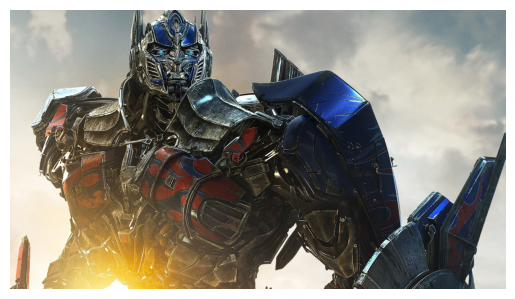

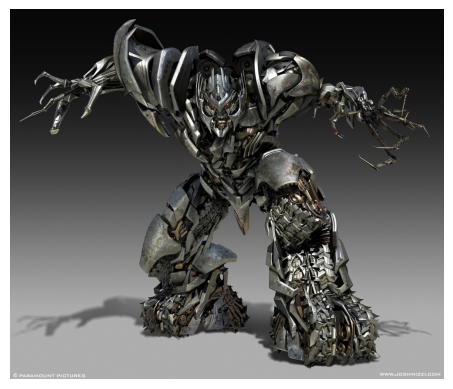

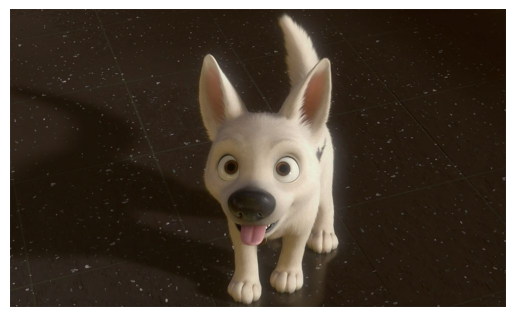

In [4]:
image_1 = Image.open('/content/transformers-age-of-extinction-optimus-prime.jpg')
image_2 = Image.open('/content/megatron.jpg')
image_3 = Image.open('/content/fake-dog.jpg')

for img in [image_1, image_2, image_3]:
    graph.imshow(img)
    graph.axis(False)
    graph.show()

## Simple - Is Transformers or not

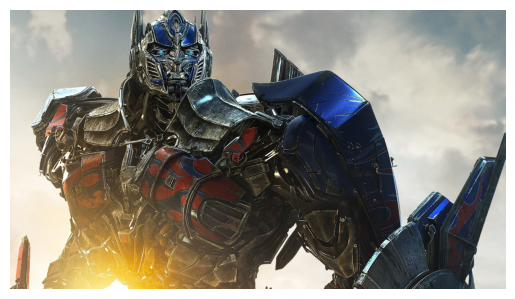

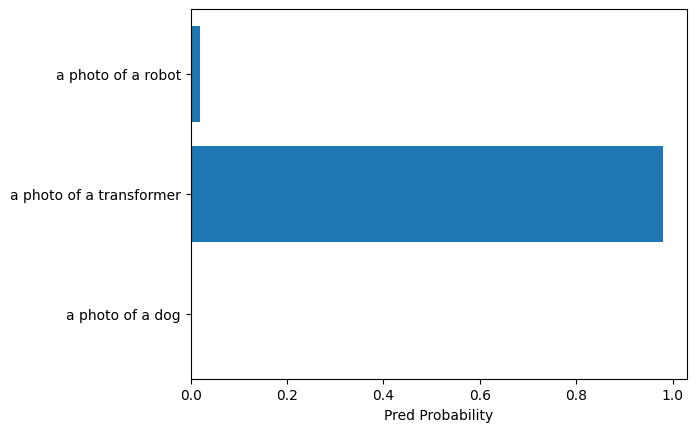

------------------------------------------------------------


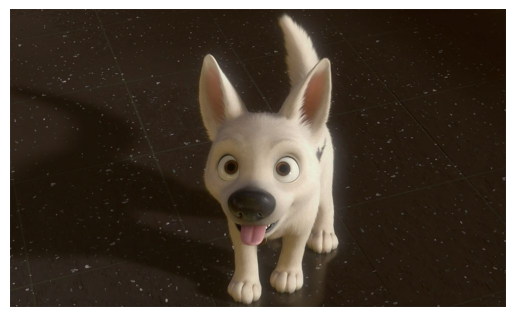

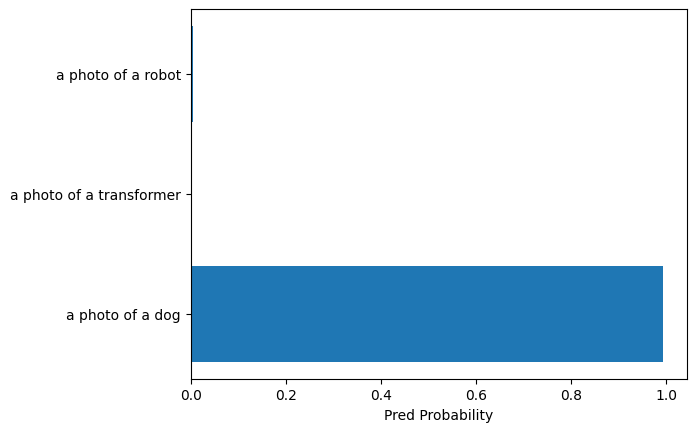

------------------------------------------------------------


In [5]:
images = [image_1, image_3]
classes = [f'a photo of a {thing}' for thing in ['dog', 'transformer', 'robot']]
with torch.inference_mode():
    x = processor(text=classes, images=images, return_tensors='pt', padding=True)
    y = model(**x)
y_hat = y.logits_per_image.softmax(dim=1).numpy()

for img, y_hat_i in zip(images, y_hat):
    graph.imshow(img)
    graph.axis(False)
    graph.show()

    plot_barplot(dict(zip(classes, y_hat_i)))
    graph.xlabel('Pred Probability')
    graph.show()
    print('-'*60)

## Harder - Highly specific classification

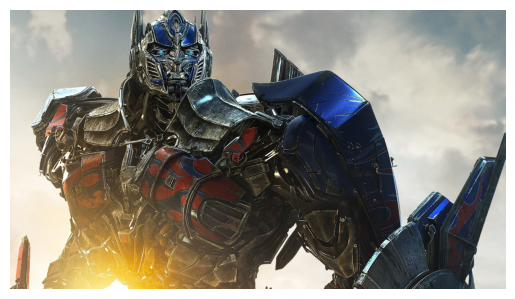

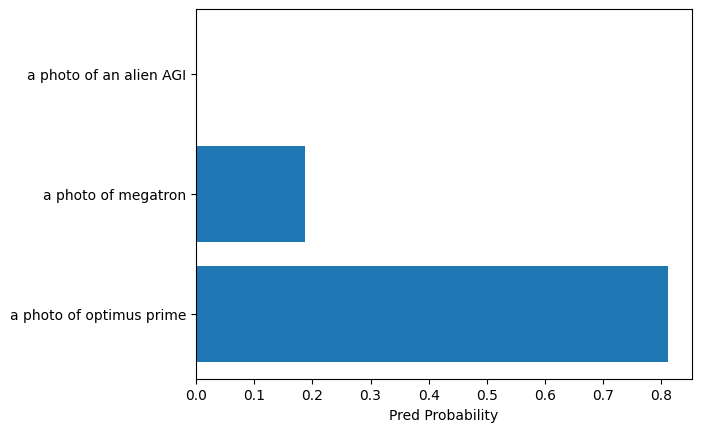

------------------------------------------------------------


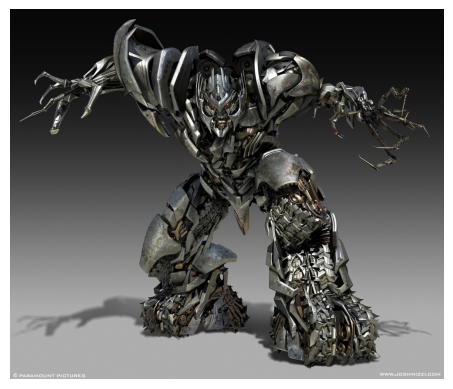

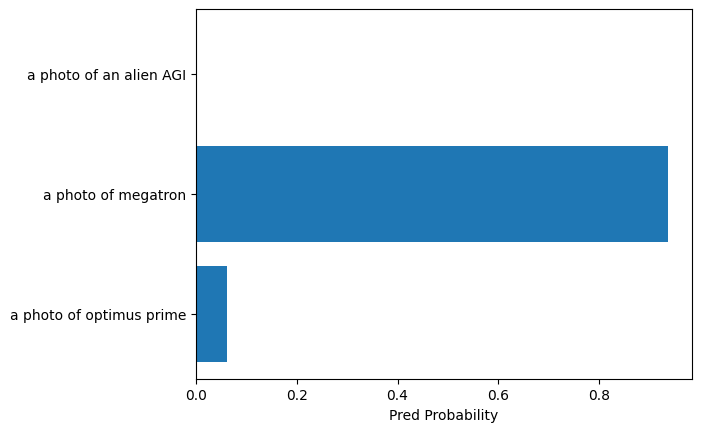

------------------------------------------------------------


In [6]:
images = [image_1, image_2]
classes = [f'a photo of {thing}' for thing in ['optimus prime', 'megatron', 'an alien AGI']]
with torch.inference_mode():
    x = processor(text=classes, images=images, return_tensors='pt', padding=True)
    y = model(**x)
y_hat = y.logits_per_image.softmax(dim=1).numpy()

for img, y_hat_i in zip(images, y_hat):
    graph.imshow(img)
    graph.axis(False)
    graph.show()

    plot_barplot(dict(zip(classes, y_hat_i)))
    graph.xlabel('Pred Probability')
    graph.show()
    print('-'*60)

## Very Hard - Final Fantasy Character - Hero or villian?

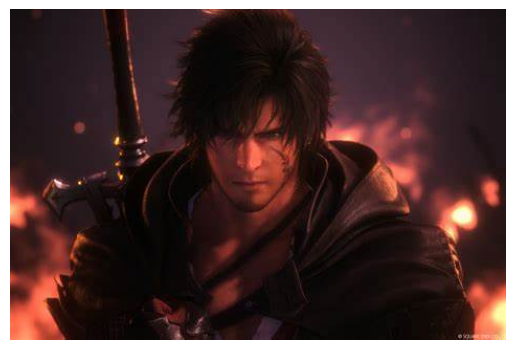

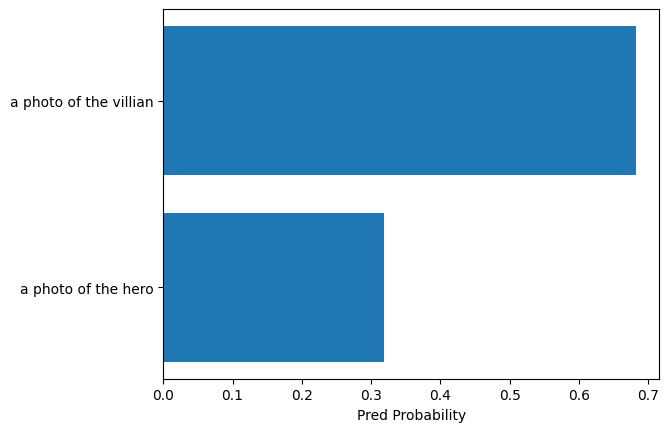

------------------------------------------------------------


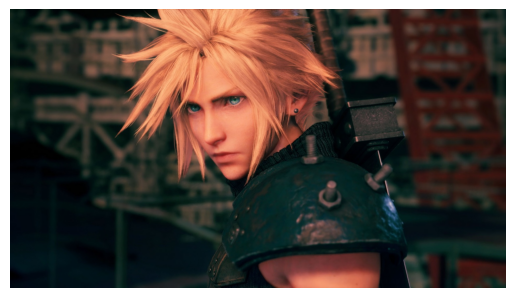

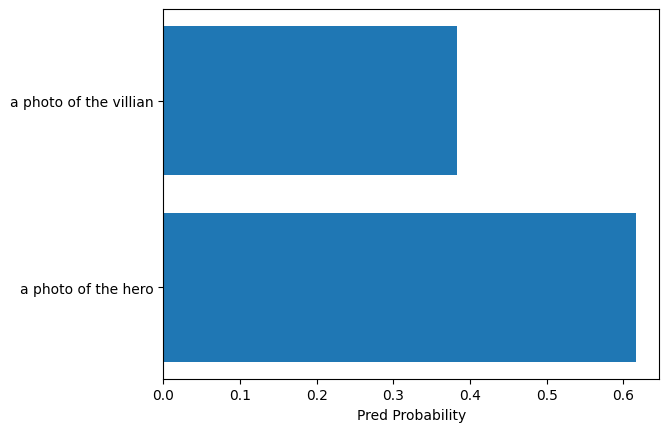

------------------------------------------------------------


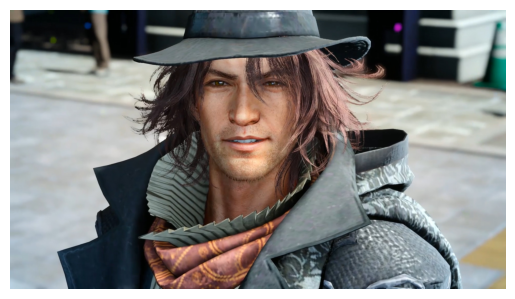

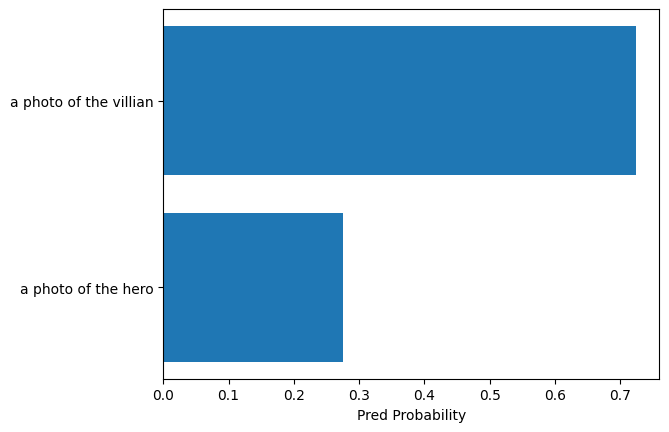

------------------------------------------------------------


In [7]:
image_hero = Image.open('/content/OIP.jpg')
image_hero_2 = Image.open('/content/watch-final-fantasy-vii-remake-cloud-strife-trailer-plus-new-bosses-teased.jpg')
image_villian = Image.open('/content/Final-Fantasy-XV_20181107_02.png')

images = [image_hero, image_hero_2, image_villian]
classes = [f'a photo of the {thing}' for thing in ['hero', 'villian']]
with torch.inference_mode():
    x = processor(text=classes, images=images, return_tensors='pt', padding=True)
    y = model(**x)
y_hat = y.logits_per_image.softmax(dim=1).numpy()

for img, y_hat_i in zip(images, y_hat):
    graph.imshow(img)
    graph.axis(False)
    graph.show()

    plot_barplot(dict(zip(classes, y_hat_i)))
    graph.xlabel('Pred Probability')
    graph.show()
    print('-'*60)